EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_variants = pd.read_csv("training_variants.csv")
train_text = pd.read_csv("training_text.csv", sep='\|\|', engine='python', header = None, skiprows=1, names=['ID', 'Text'])
train = pd.merge(train_variants, train_text, on='ID', how='inner')

In [ ]:
train_variants.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
train.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
train.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
Text         object
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   Text       3316 non-null   object
dtypes: int64(2), object(3)
memory usage: 129.9+ KB


Point Mutations Detected:
        ID   Gene Variation  Class  \
13      13    CBL     C381A      4   
28      28   TERT     C228T      7   
34      34   TERT     C250T      7   
47      47  PTPRT     A707T      1   
50      50  PTPRT     A209T      1   
...    ...    ...       ...    ...   
3176  3176  HNF1A     T196A      3   
3242  3242   DDR2     G253C      7   
3251  3251  CASP8     G325A      7   
3255  3255  CASP8     C248T      3   
3258  3258    RET     A883T      7   

                                                   Text  substitution  \
13    Noonan syndrome is an autosomal dominant conge...          True   
28    Sequencing studies have identified many recurr...          True   
34    Sequencing studies have identified many recurr...          True   
47    The receptor protein tyrosine phosphatase T (P...          True   
50    Receptor protein tyrosine phosphatase T (PTPRT...          True   
...                                                 ...           ...   
3176  

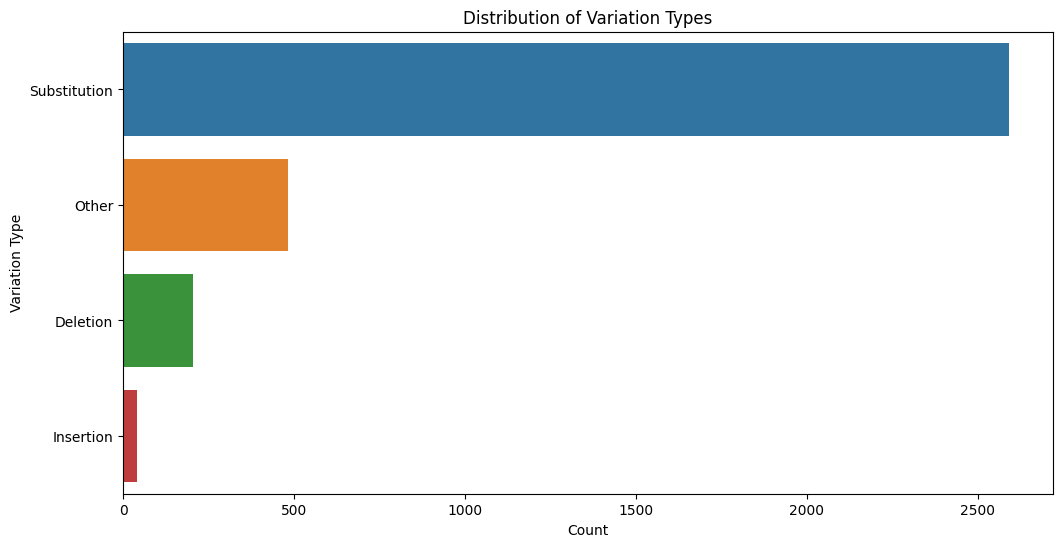


Variation Type Summary:
variation_type
Substitution    2591
Other            482
Deletion         206
Insertion         42
Name: count, dtype: int64


,ID,Gene,Variation,Class,Text,substitution,insertion,deletion,point_mutation,variation_type
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,False,False,False,False,Other
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,False,False,False,False,Other
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,True,False,False,False,Substitution
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,True,False,False,False,Substitution
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,True,False,False,False,Substitution
...,...,...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...,True,False,False,False,Substitution
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...,False,False,False,False,Other
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...,False,False,False,False,Other
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...,True,False,False,False,Substitution


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorize_variations(df):
    """Categorize variations into amino acid substitutions, insertions, deletions, and point mutations."""

    # Define the pattern for amino acid substitutions (e.g., Q249E, L399V)
    aa_substitution_pattern = r'^[A-Z]{1}\d+[A-Z]{1}$'

    # Check for amino acid substitutions
    df['substitution'] = df['Variation'].str.match(aa_substitution_pattern)

    # Check for insertions and deletions
    df['insertion'] = df['Variation'].str.contains('ins', case=False, na=False)
    df['deletion'] = df['Variation'].str.contains('del', case=False, na=False)

    # Check for point mutations (nucleotide changes)
    df['point_mutation'] = df['Variation'].str.match(r'^[ACGTacgt]{1}\d+[ACGTacgt]{1}$')

    # Print detected point mutations for debugging
    print("Point Mutations Detected:")
    print(df[df['point_mutation']])

    # Categorize variation types (order matters to prevent overwriting substitutions)
    df['variation_type'] = 'Other'

    # First, classify Point Mutations (if any) to prevent overlap
    df.loc[df['point_mutation'], 'variation_type'] = 'Point Mutation'

    # Then, classify Substitutions (non-overlapping with point mutations)
    df.loc[df['substitution'], 'variation_type'] = 'Substitution'

    # Classify Insertions and Deletions
    df.loc[df['insertion'], 'variation_type'] = 'Insertion'
    df.loc[df['deletion'], 'variation_type'] = 'Deletion'

    # Plot the distribution of variation types
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='variation_type', order=df['variation_type'].value_counts().index)
    plt.title('Distribution of Variation Types')
    plt.xlabel('Count')
    plt.ylabel('Variation Type')
    plt.show()

    # Print counts of each variation type
    print("\nVariation Type Summary:")
    print(df['variation_type'].value_counts())

    # Return the modified dataframe
    return df

categorize_variations(train)


In [ ]:
print(train['Variation'].unique())

['Truncating Mutations' 'W802*' 'Q249E' ... 'A122*' 'R80C' 'K83E']


In [ ]:
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [ ]:
def basic_stats(df):
    print("Dataset Shape", df.shape)
    print(f"\nMissing Vlaues: \n{df.isnull().sum()} ")
    print(f"\nClass Distribution:{df['Class'].value_counts().sort_index()}")

    #Gene statistics
    print("\nNumber of unique genes: ", df['Gene'].nunique())
    print(f"\nTop 10 most common genes:{df['Gene'].value_counts().head(10)} ")

    #Variation statistics
    print(f"\nNumber of unique variations:{df['Variation'].nunique()}")
    print(f"\nTop 10 most common variations: {df['Variation'].value_counts().head(10)}")

print("=== Basic Statistics ===")
basic_stats(train)

=== Basic Statistics ===
Dataset Shape (3321, 10)

Missing Vlaues: 
ID                0
Gene              0
Variation         0
Class             0
Text              5
substitution      0
insertion         0
deletion          0
point_mutation    0
variation_type    0
dtype: int64 

Class Distribution:Class
1    568
2    452
3     89
4    686
5    242
6    275
7    953
8     19
9     37
Name: count, dtype: int64

Number of unique genes:  264

Top 10 most common genes:Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
Name: count, dtype: int64 

Number of unique variations:2996

Top 10 most common variations: Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61L                     3
E17K                     3
T58I                     3
Q61R                     3
Name: count

In [4]:
#since we found missing values ub text , we have to handle it
train['Text'] = train['Text'].fillna("")


=== Class Distribution Analysis ===


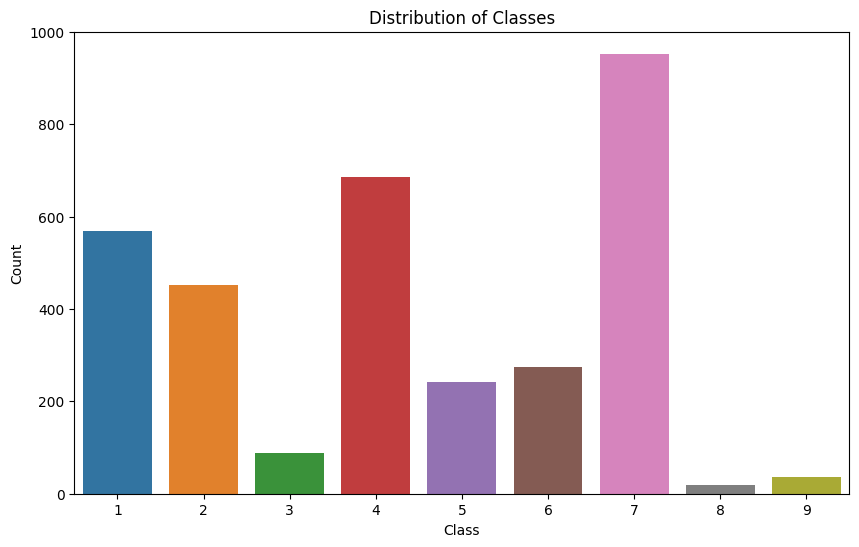


Class Percentages:
Class
7    28.70
4    20.66
1    17.10
2    13.61
6     8.28
5     7.29
3     2.68
9     1.11
8     0.57
Name: proportion, dtype: float64


In [ ]:
def plot_class_distribution(df):
    """Plot the distribution of classes"""
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Class')
    plt.title('Distribution of Classes')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

    # Calculate class percentages
    class_percentages = (df['Class'].value_counts(normalize=True) * 100).round(2)
    print("\nClass Percentages:")
    print(class_percentages)

print("\n=== Class Distribution Analysis ===")
plot_class_distribution(train)


=== Text Length Analysis ===


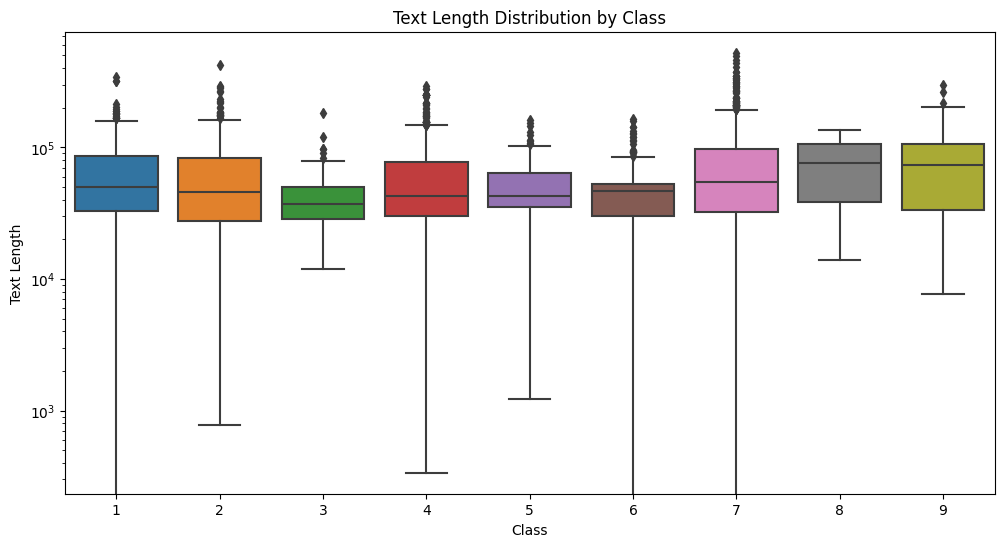


Text Length Statistics:
count      3321.000000
mean      63615.965372
std       52189.336718
min           0.000000
25%       31337.000000
50%       46134.000000
75%       80154.000000
max      523393.000000
Name: text_length, dtype: float64


In [ ]:
def analyze_text_length(df):
    """Analyze the length of text descriptions"""
    df['text_length'] = df['Text'].fillna('').str.len()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Class', y='text_length')
    plt.title('Text Length Distribution by Class')
    plt.xlabel('Class')
    plt.ylabel('Text Length')
    plt.yscale('log')
    plt.show()

    print("\nText Length Statistics:")
    print(df['text_length'].describe())

print("\n=== Text Length Analysis ===")
analyze_text_length(train)


=== Gene Class Relationship Analysis ===


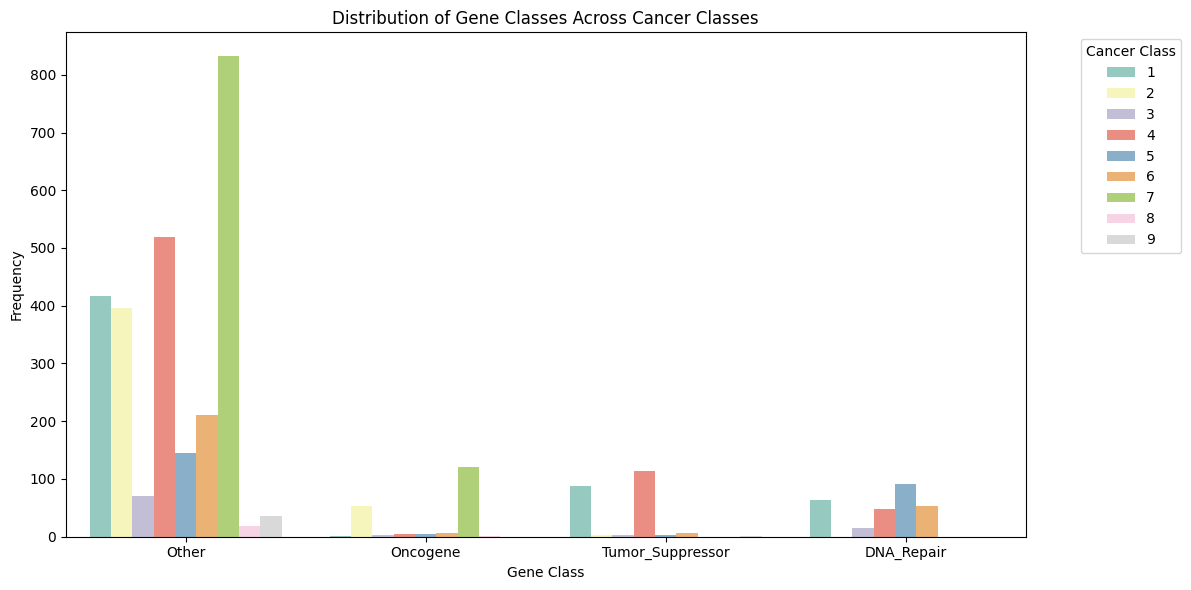

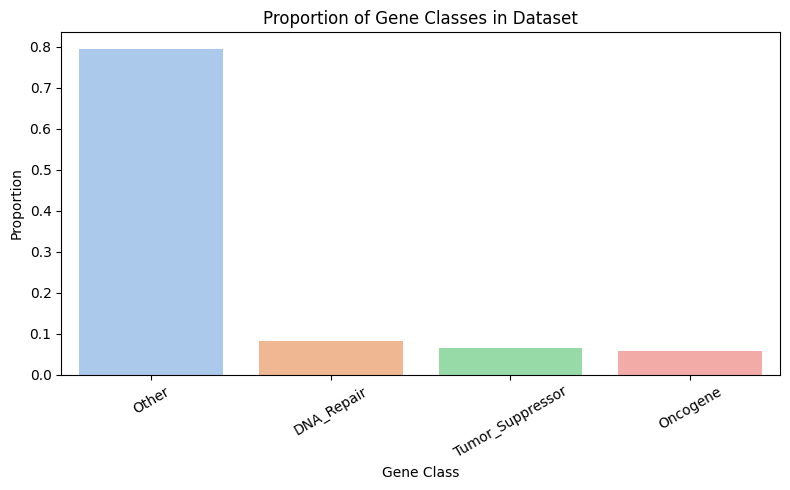

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_gene_class_relationships(df):
    """Visualize gene class relationships across cancer classes"""

    # Optional: mock gene class if not in dataset
    if 'Gene_Class' not in df.columns:
        gene_class_map = {
            'TP53': 'Tumor_Suppressor',
            'KRAS': 'Oncogene',
            'BRCA1': 'DNA_Repair',
            'EGFR': 'Oncogene',
            'MYC': 'Oncogene',
            'ATM': 'DNA_Repair',
            'CDKN2A': 'Tumor_Suppressor'
            # Add more known genes as needed
        }
        df['Gene_Class'] = df['Gene'].map(gene_class_map).fillna('Other')

    # Countplot: Gene class distribution per class
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Gene_Class', hue='Class', palette='Set3')
    plt.title('Distribution of Gene Classes Across Cancer Classes')
    plt.xlabel('Gene Class')
    plt.ylabel('Frequency')
    plt.legend(title='Cancer Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Optional: Barplot - proportion of gene classes in dataset
    plt.figure(figsize=(8, 5))
    gene_class_counts = df['Gene_Class'].value_counts(normalize=True).sort_values(ascending=False)
    sns.barplot(x=gene_class_counts.index, y=gene_class_counts.values, palette='pastel')
    plt.title('Proportion of Gene Classes in Dataset')
    plt.ylabel('Proportion')
    plt.xlabel('Gene Class')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

print("\n=== Gene Class Relationship Analysis ===")
analyze_gene_class_relationships(train)


In [7]:
import pandas as pd

# Define gene-to-class mapping with descriptions
gene_class_data = [
    {"Gene": "TP53", "Gene_Class": "Tumor_Suppressor", "Description": "Regulates cell cycle and apoptosis"},
    {"Gene": "BRCA1", "Gene_Class": "DNA_Repair", "Description": "Involved in homologous recombination repair"},
    {"Gene": "BRCA2", "Gene_Class": "DNA_Repair", "Description": "Works with BRCA1 to repair DNA double-strand breaks"},
    {"Gene": "EGFR", "Gene_Class": "Oncogene", "Description": "Receptor tyrosine kinase that drives cell growth"},
    {"Gene": "PTEN", "Gene_Class": "Tumor_Suppressor", "Description": "Negative regulator of PI3K/AKT pathway"},
    {"Gene": "KRAS", "Gene_Class": "Oncogene", "Description": "GTPase involved in RAS/MAPK signaling"},
    {"Gene": "IDH1", "Gene_Class": "Metabolic", "Description": "Mutations alter cellular metabolism and epigenetics"},
    {"Gene": "SF3B1", "Gene_Class": "Splicing_Factor", "Description": "RNA splicing factor, often mutated in leukemia"},
    {"Gene": "EZH2", "Gene_Class": "Epigenetic_Regulator", "Description": "Part of Polycomb complex; gene silencing"},
    {"Gene": "PIK3CA", "Gene_Class": "Oncogene", "Description": "Catalytic subunit of PI3K, promotes survival and growth"},
    {"Gene": "CDKN2A", "Gene_Class": "Tumor_Suppressor", "Description": "Inhibits cyclin-dependent kinases"},
    {"Gene": "ERBB2", "Gene_Class": "Oncogene", "Description": "HER2 receptor tyrosine kinase"},
    {"Gene": "ALK", "Gene_Class": "Oncogene", "Description": "Fusion or point mutations activate kinase activity"},
    {"Gene": "MLH1", "Gene_Class": "DNA_Repair", "Description": "Mismatch repair gene, linked to Lynch syndrome"},
    {"Gene": "NOTCH1", "Gene_Class": "Transcription_Factor", "Description": "Context-dependent oncogene/tumor suppressor"},
    {"Gene": "SMAD4", "Gene_Class": "Tumor_Suppressor", "Description": "TGF-beta signaling mediator"},
    {"Gene": "NF1", "Gene_Class": "Tumor_Suppressor", "Description": "Inhibits RAS signaling"},
    {"Gene": "MET", "Gene_Class": "Oncogene", "Description": "Hepatocyte growth factor receptor"},
    {"Gene": "ERCC2", "Gene_Class": "DNA_Repair", "Description": "Involved in nucleotide excision repair"},
    {"Gene": "TET2", "Gene_Class": "Epigenetic_Regulator", "Description": "DNA demethylation regulator"},
    {"Gene": "RUNX1", "Gene_Class": "Transcription_Factor", "Description": "Hematopoietic development, leukemia driver"}
]

# Create DataFrame
gene_class_df = pd.DataFrame(gene_class_data)

# Display
print(gene_class_df)

# Save to CSV if needed
gene_class_df.to_csv("gene_class_mapping.csv", index=False)


      Gene            Gene_Class  \
0     TP53      Tumor_Suppressor   
1    BRCA1            DNA_Repair   
2    BRCA2            DNA_Repair   
3     EGFR              Oncogene   
4     PTEN      Tumor_Suppressor   
5     KRAS              Oncogene   
6     IDH1             Metabolic   
7    SF3B1       Splicing_Factor   
8     EZH2  Epigenetic_Regulator   
9   PIK3CA              Oncogene   
10  CDKN2A      Tumor_Suppressor   
11   ERBB2              Oncogene   
12     ALK              Oncogene   
13    MLH1            DNA_Repair   
14  NOTCH1  Transcription_Factor   
15   SMAD4      Tumor_Suppressor   
16     NF1      Tumor_Suppressor   
17     MET              Oncogene   
18   ERCC2            DNA_Repair   
19    TET2  Epigenetic_Regulator   
20   RUNX1  Transcription_Factor   

                                          Description  
0                  Regulates cell cycle and apoptosis  
1         Involved in homologous recombination repair  
2   Works with BRCA1 to repair DNA doub


=== Gene Class Relationship Analysis ===


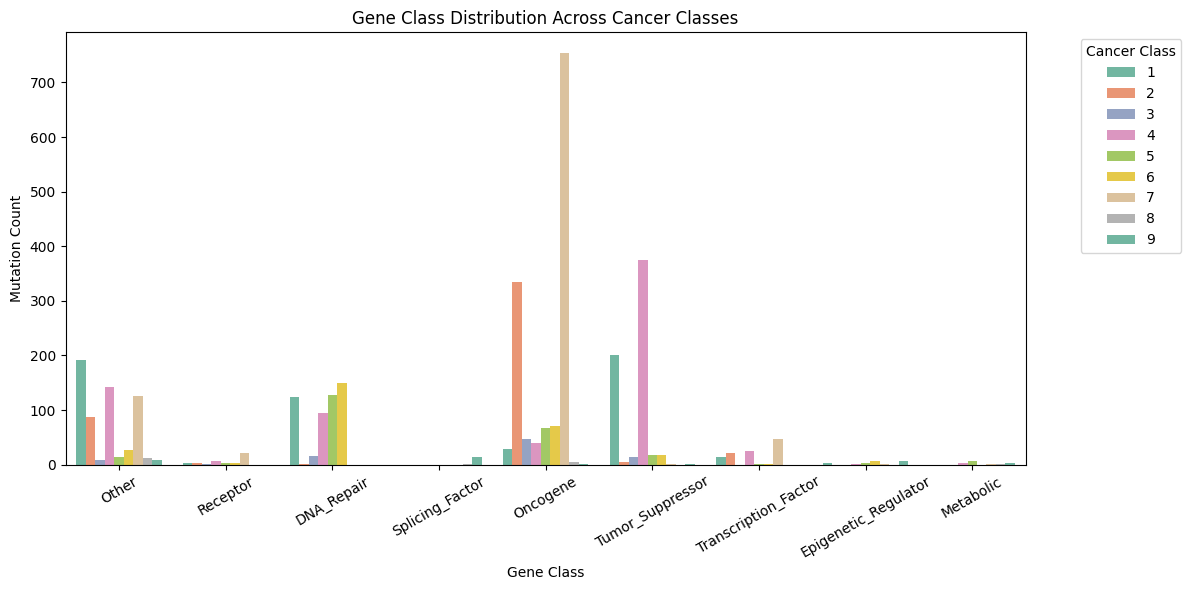

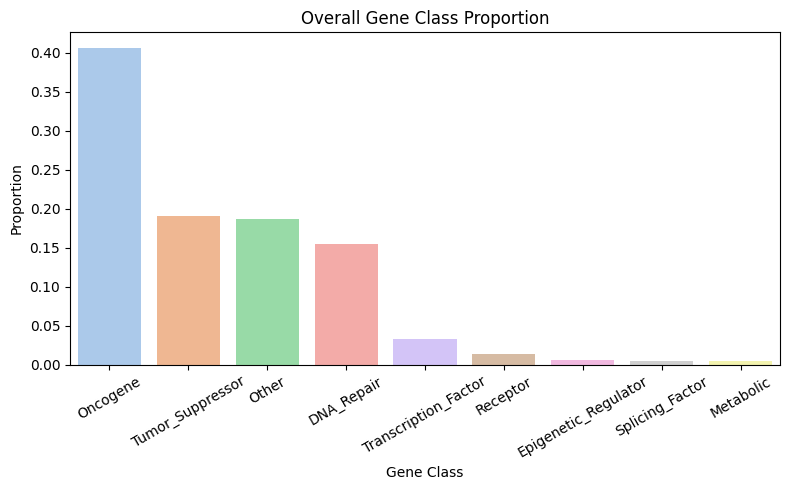

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define your gene-to-class mapping
gene_class_map = {
    'BRCA1': 'DNA_Repair', 'TP53': 'Tumor_Suppressor', 'EGFR': 'Oncogene', 'PTEN': 'Tumor_Suppressor',
    'BRCA2': 'DNA_Repair', 'KIT': 'Oncogene', 'BRAF': 'Oncogene', 'ALK': 'Oncogene', 'ERBB2': 'Oncogene',
    'PDGFRA': 'Oncogene', 'PIK3CA': 'Oncogene', 'CDKN2A': 'Tumor_Suppressor', 'FGFR2': 'Oncogene',
    'FLT3': 'Oncogene', 'TSC2': 'Tumor_Suppressor', 'MTOR': 'Oncogene', 'KRAS': 'Oncogene',
    'MAP2K1': 'Oncogene', 'VHL': 'Tumor_Suppressor', 'RET': 'Oncogene', 'FGFR3': 'Oncogene',
    'MLH1': 'DNA_Repair', 'JAK2': 'Oncogene', 'SMAD4': 'Tumor_Suppressor', 'MET': 'Oncogene',
    'NOTCH1': 'Transcription_Factor', 'AKT1': 'Oncogene', 'ROS1': 'Oncogene', 'PTPN11': 'Oncogene',
    'ABL1': 'Oncogene', 'CBL': 'Other', 'CTNNB1': 'Oncogene', 'PIK3R1': 'Oncogene', 'RUNX1': 'Transcription_Factor',
    'PDGFRB': 'Oncogene', 'PTPRT': 'Other', 'SMAD3': 'Tumor_Suppressor', 'NFE2L2': 'Transcription_Factor',
    'HRAS': 'Oncogene', 'SMO': 'Oncogene', 'MSH2': 'DNA_Repair', 'ERBB4': 'Oncogene', 'SPOP': 'Other',
    'AR': 'Receptor', 'TSC1': 'Tumor_Suppressor', 'SMAD2': 'Tumor_Suppressor', 'ERCC2': 'DNA_Repair',
    'FBXW7': 'Tumor_Suppressor', 'JAK1': 'Oncogene', 'RHOA': 'Other', 'SF3B1': 'Splicing_Factor',
    'NF1': 'Tumor_Suppressor', 'IDH1': 'Metabolic', 'PMS2': 'DNA_Repair', 'ESR1': 'Receptor',
    'NTRK1': 'Oncogene', 'KEAP1': 'Tumor_Suppressor', 'TET2': 'Epigenetic_Regulator',
    'MSH6': 'DNA_Repair', 'FGFR1': 'Oncogene', 'STK11': 'Tumor_Suppressor', 'CCND1': 'Oncogene',
    'NRAS': 'Oncogene', 'RAF1': 'Oncogene', 'PPP2R1A': 'Other', 'CARD11': 'Other', 'MAP2K2': 'Oncogene',
    'NF2': 'Tumor_Suppressor', 'EWSR1': 'Other', 'AKT2': 'Oncogene', 'ERBB3': 'Oncogene',
    'PIK3CB': 'Oncogene', 'RB1': 'Tumor_Suppressor', 'POLE': 'DNA_Repair', 'CDK12': 'Other',
    'BAP1': 'Tumor_Suppressor', 'CDH1': 'Tumor_Suppressor', 'DDR2': 'Oncogene', 'EP300': 'Transcription_Factor',
    'MAP2K4': 'Tumor_Suppressor', 'DICER1': 'Other', 'FANCA': 'DNA_Repair', 'EZH2': 'Epigenetic_Regulator',
    'FOXA1': 'Transcription_Factor', 'TGFBR1': 'Receptor', 'PIK3R2': 'Oncogene', 'ETV6': 'Transcription_Factor',
    'STAT3': 'Transcription_Factor'
}

# Step 2: Main EDA function
def analyze_gene_class_relationships(df):
    """Visualize gene class distribution across cancer classes"""

    # Add gene class column
    df['Gene_Class'] = df['Gene'].map(gene_class_map).fillna('Other')

    # Plot 1: Gene class across cancer classes
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Gene_Class', hue='Class', palette='Set2')
    plt.title('Gene Class Distribution Across Cancer Classes')
    plt.xlabel('Gene Class')
    plt.ylabel('Mutation Count')
    plt.legend(title='Cancer Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

    # Plot 2: Proportion of each gene class overall
    plt.figure(figsize=(8, 5))
    gene_class_counts = df['Gene_Class'].value_counts(normalize=True).sort_values(ascending=False)
    sns.barplot(x=gene_class_counts.index, y=gene_class_counts.values, palette='pastel')
    plt.title('Overall Gene Class Proportion')
    plt.ylabel('Proportion')
    plt.xlabel('Gene Class')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# === Run the analysis ===
print("\n=== Gene Class Relationship Analysis ===")
analyze_gene_class_relationships(train)  # Replace 'train' with your DataFrame variable if named differently



=== Gene-Variation-Class Relationship Analysis ===

Top genes for each class:

Class 1:
Gene
TP53     83
BRCA1    60
TSC2     23
BRCA2    18
ERCC2    17
Name: count, dtype: int64

Class 2:
Gene
EGFR    45
KIT     44
BRAF    31
ABL1    24
ROS1    18
Name: count, dtype: int64

Class 3:
Gene
BRCA1     15
MTOR      11
ALK       10
PDGFRA     9
FLT3       7
Name: count, dtype: int64

Class 4:
Gene
PTEN      115
TP53       67
CDKN2A     47
BRCA1      46
VHL        23
Name: count, dtype: int64

Class 5:
Gene
BRCA1     90
BRCA2     20
FGFR3     10
BRAF       8
PIK3CA     8
Name: count, dtype: int64

Class 6:
Gene
BRCA2    84
BRCA1    53
JAK2     14
ERBB2    12
MLH1     11
Name: count, dtype: int64

Class 7:
Gene
EGFR      84
KIT       52
BRAF      48
ALK       47
PDGFRA    42
Name: count, dtype: int64

Class 8:
Gene
BCOR     4
H3F3A    3
AKT1     2
IDH2     2
SF3B1    1
Name: count, dtype: int64

Class 9:
Gene
SF3B1    15
EZH2      6
IDH1      4
U2AF1     3
IDH2      3
Name: count, dtype: int

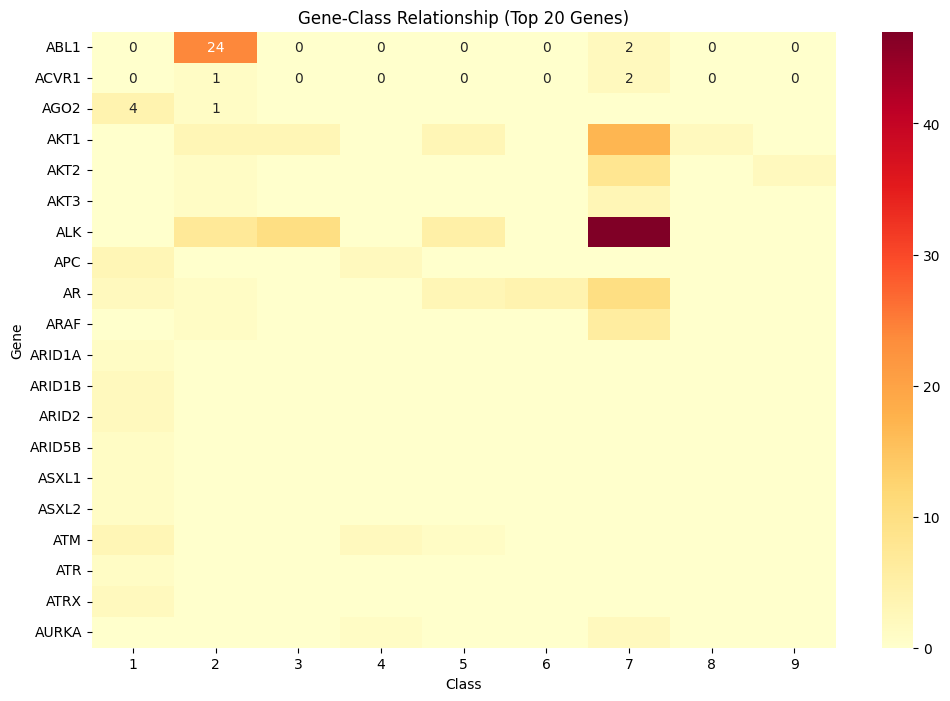

In [ ]:
def analyze_gene_variation_relationships(df):
    """Analyze relationships between genes, variations, and classes"""
    # Gene frequency by class
    gene_class = pd.crosstab(df['Gene'], df['Class'])

    # Top genes per class
    print("\nTop genes for each class:")
    for class_num in range(1, 10):
        print(f"\nClass {class_num}:")
        print(df[df['Class'] == class_num]['Gene'].value_counts().head(5))

    # Create a heatmap of gene-class relationships
    plt.figure(figsize=(12, 8))
    sns.heatmap(gene_class.head(20), cmap='YlOrRd', annot=True, fmt='d')
    plt.title('Gene-Class Relationship (Top 20 Genes)')
    plt.show()

print("\n=== Gene-Variation-Class Relationship Analysis ===")
analyze_gene_variation_relationships(train)

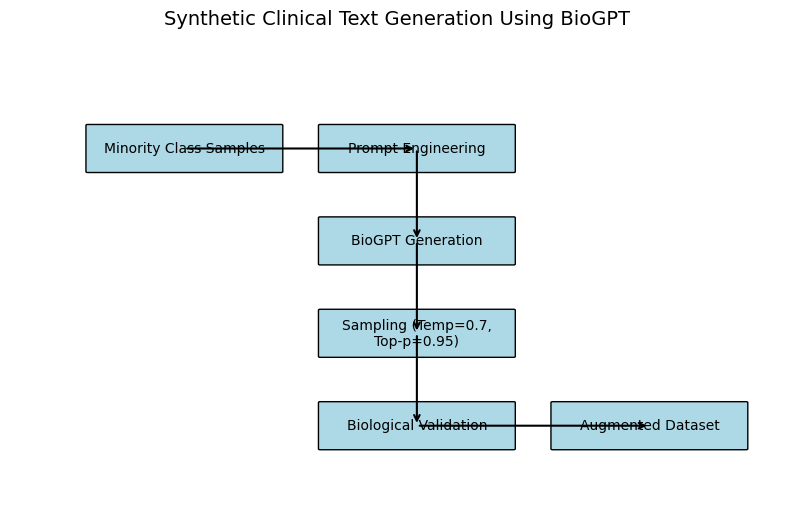

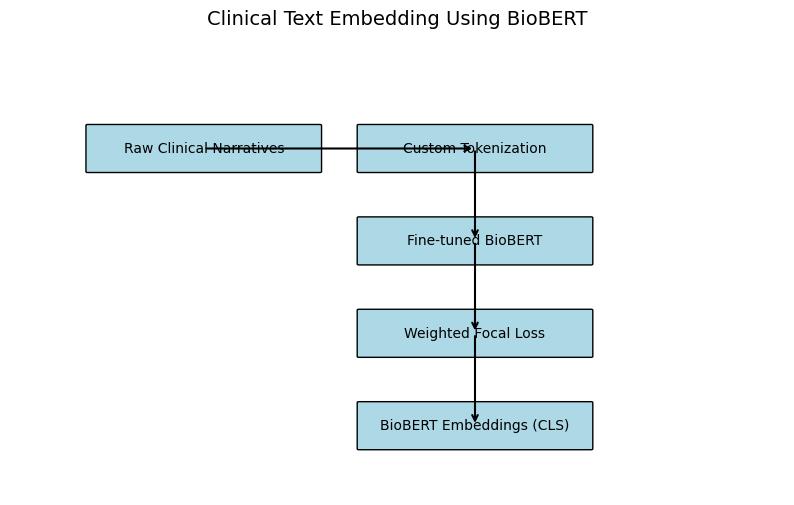

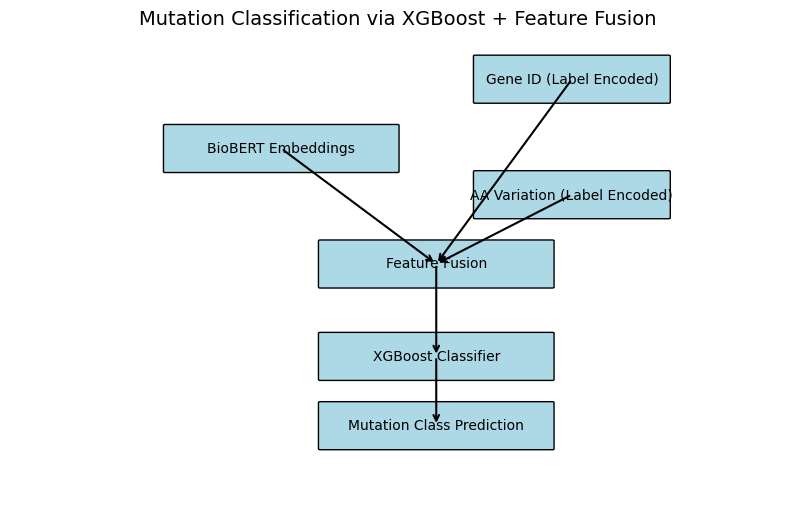

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_flowchart(model_name, elements, connections, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    box_coords = {}

    # Draw boxes
    for elem in elements:
        name, x, y, w, h = elem
        box = patches.FancyBboxPatch((x, y), w, h,
                                     boxstyle="round,pad=0.02",
                                     edgecolor='black', facecolor='lightblue')
        ax.add_patch(box)
        ax.text(x + w/2, y + h/2, name, ha='center', va='center', fontsize=10)
        box_coords[name] = (x + w/2, y + h/2)

    # Draw arrows
    for conn in connections:
        start, end = conn
        sx, sy = box_coords[start]
        ex, ey = box_coords[end]
        ax.annotate('', xy=(ex, ey), xytext=(sx, sy),
                    arrowprops=dict(arrowstyle='->', lw=1.5))

    plt.title(model_name, fontsize=14)
    plt.show()

# --- Flowchart 1: BioGPT Data Augmentation ---
elements_biogpt = [
    ("Minority Class Samples", 1, 7, 2.5, 1),
    ("Prompt Engineering", 4, 7, 2.5, 1),
    ("BioGPT Generation", 4, 5, 2.5, 1),
    ("Sampling (Temp=0.7,\nTop-p=0.95)", 4, 3, 2.5, 1),
    ("Biological Validation", 4, 1, 2.5, 1),
    ("Augmented Dataset", 7, 1, 2.5, 1)
]
connections_biogpt = [
    ("Minority Class Samples", "Prompt Engineering"),
    ("Prompt Engineering", "BioGPT Generation"),
    ("BioGPT Generation", "Sampling (Temp=0.7,\nTop-p=0.95)"),
    ("Sampling (Temp=0.7,\nTop-p=0.95)", "Biological Validation"),
    ("Biological Validation", "Augmented Dataset")
]
draw_flowchart("Synthetic Clinical Text Generation Using BioGPT", elements_biogpt, connections_biogpt)

# --- Flowchart 2: BioBERT Embedding ---
elements_biobert = [
    ("Raw Clinical Narratives", 1, 7, 3, 1),
    ("Custom Tokenization", 4.5, 7, 3, 1),
    ("Fine-tuned BioBERT", 4.5, 5, 3, 1),
    ("Weighted Focal Loss", 4.5, 3, 3, 1),
    ("BioBERT Embeddings (CLS)", 4.5, 1, 3, 1)
]
connections_biobert = [
    ("Raw Clinical Narratives", "Custom Tokenization"),
    ("Custom Tokenization", "Fine-tuned BioBERT"),
    ("Fine-tuned BioBERT", "Weighted Focal Loss"),
    ("Weighted Focal Loss", "BioBERT Embeddings (CLS)")
]
draw_flowchart("Clinical Text Embedding Using BioBERT", elements_biobert, connections_biobert)

# --- Flowchart 3: XGBoost + Feature Fusion ---
elements_xgb = [
    ("BioBERT Embeddings", 2, 7, 3, 1),
    ("Gene ID (Label Encoded)", 6, 8.5, 2.5, 1),
    ("AA Variation (Label Encoded)", 6, 6, 2.5, 1),
    ("Feature Fusion", 4, 4.5, 3, 1),
    ("XGBoost Classifier", 4, 2.5, 3, 1),
    ("Mutation Class Prediction", 4, 1, 3, 1)
]
connections_xgb = [
    ("BioBERT Embeddings", "Feature Fusion"),
    ("Gene ID (Label Encoded)", "Feature Fusion"),
    ("AA Variation (Label Encoded)", "Feature Fusion"),
    ("Feature Fusion", "XGBoost Classifier"),
    ("XGBoost Classifier", "Mutation Class Prediction")
]
draw_flowchart("Mutation Classification via XGBoost + Feature Fusion", elements_xgb, connections_xgb)



=== Text Content Analysis ===


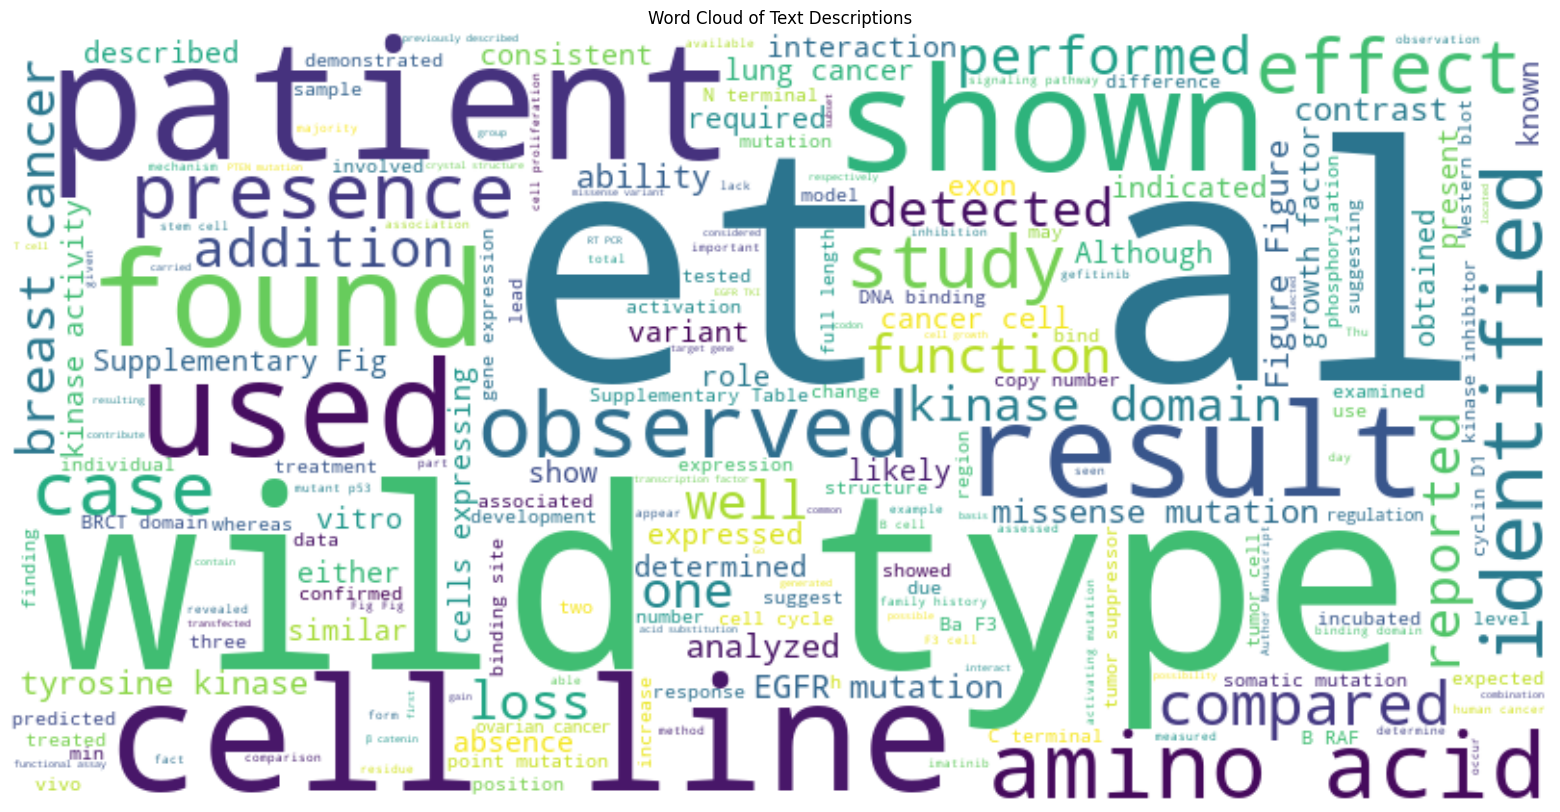

In [ ]:
def create_text_wordcloud(df):
    """Create word clouds for text analysis"""
    # Combine all text
    text = ' '.join(df['Text'].fillna(''))

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Descriptions')
    plt.show()

print("\n=== Text Content Analysis ===")
create_text_wordcloud(train)




In [ ]:
def analyze_common_terms(df):
    """Analyze most common terms in text by class"""
    vectorizer = CountVectorizer(stop_words='english', max_features=20)

    for class_num in range(1, 10):
        print(f"\nMost common terms in Class {class_num}:")
        class_text = df[df['Class'] == class_num]['Text'].fillna('')
        term_matrix = vectorizer.fit_transform(class_text)
        terms = vectorizer.get_feature_names_out()
        term_sums = term_matrix.sum(axis=0).A1

        # Create dictionary of term frequencies
        term_freq = dict(zip(terms, term_sums))
        sorted_terms = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)

        for term, freq in sorted_terms[:10]:
            print(f"{term}: {freq}")

analyze_common_terms(train)


Most common terms in Class 1:
mutations: 33734
cells: 28451
cell: 20386
p53: 19441
et: 18973
al: 18873
protein: 18145
fig: 18099
cancer: 17965
mutation: 17246

Most common terms in Class 2:
mutations: 34610
cells: 23165
patients: 19283
cell: 18315
mutation: 15200
et: 14718
al: 14653
cancer: 13262
figure: 13011
fig: 12857

Most common terms in Class 3:
mutations: 6258
brca1: 4266
cells: 3900
al: 3023
variants: 2937
et: 2853
cancer: 2648
mutation: 2187
figure: 2181
alk: 2075

Most common terms in Class 4:
mutations: 46501
cells: 37115
pten: 25841
protein: 24278
et: 21997
al: 21863
activity: 21625
cell: 21223
fig: 21193
figure: 19398

Most common terms in Class 5:
brca1: 14495
variants: 14393
mutations: 13066
cancer: 7885
cells: 7506
protein: 6153
mutation: 5805
functional: 5656
fig: 5558
type: 5453

Most common terms in Class 6:
brca1: 14116
mutations: 12151
variants: 11526
cancer: 7075
mutation: 6876
cells: 6480
fig: 6179
deleterious: 5788
data: 5482
binding: 5268

Most common terms in


=== Variation Pattern Analysis ===
Shape of extracted substitution data: (3321, 3)


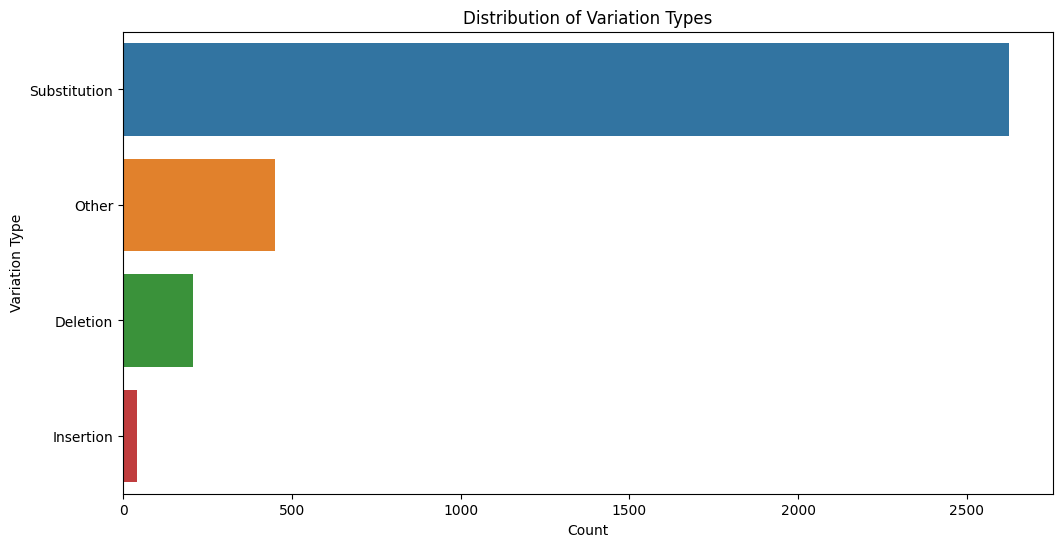


Variation type distribution:
variation_type
Substitution    2624
Other            449
Deletion         206
Insertion         42
Name: count, dtype: int64


In [4]:

import seaborn as sns
import matplotlib.pyplot as plt

def analyze_variation_patterns(df):
    """Analyze patterns in the variation column"""

    # Detect Substitutions (amino acid changes like Q249E, L399V)
    substitution_result = df['Variation'].str.extract(r'([A-Z])(\d+)([A-Z])')

    # Check the shape of the extracted result
    print(f"Shape of extracted substitution data: {substitution_result.shape}")

    # Handle cases where no match is found by filling NaNs with 'No match'
    df['substitution'] = substitution_result[0].fillna('No match')

    # Detect Point Mutations (single nucleotide change like A1234G)
    df['point_mutation'] = df['Variation'].str.match(r'^[A-T]{1}\d+[A-T]{1}$')

    # Detect Insertions (e.g., ins1, ins10)
    df['insertion'] = df['Variation'].str.contains('ins', case=False, na=False)

    # Detect Deletions (e.g., del2, del7)
    df['deletion'] = df['Variation'].str.contains('del', case=False, na=False)

    # Classify variation types
    df['variation_type'] = 'Other'  # Default to 'Other'

    # Classify Point Mutations
    df.loc[df['point_mutation'], 'variation_type'] = 'Point Mutation'

    # Classify Substitutions (non-null substitutions)
    df.loc[df['substitution'] != 'No match', 'variation_type'] = 'Substitution'

    # Classify Insertions and Deletions
    df.loc[df['insertion'], 'variation_type'] = 'Insertion'
    df.loc[df['deletion'], 'variation_type'] = 'Deletion'

    # Plot the distribution of variation types
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='variation_type', order=df['variation_type'].value_counts().index)
    plt.title('Distribution of Variation Types')
    plt.xlabel('Count')
    plt.ylabel('Variation Type')
    plt.show()

    # Print the variation type distribution
    print("\nVariation type distribution:")
    print(df['variation_type'].value_counts())

print("\n=== Variation Pattern Analysis ===")
analyze_variation_patterns(train)




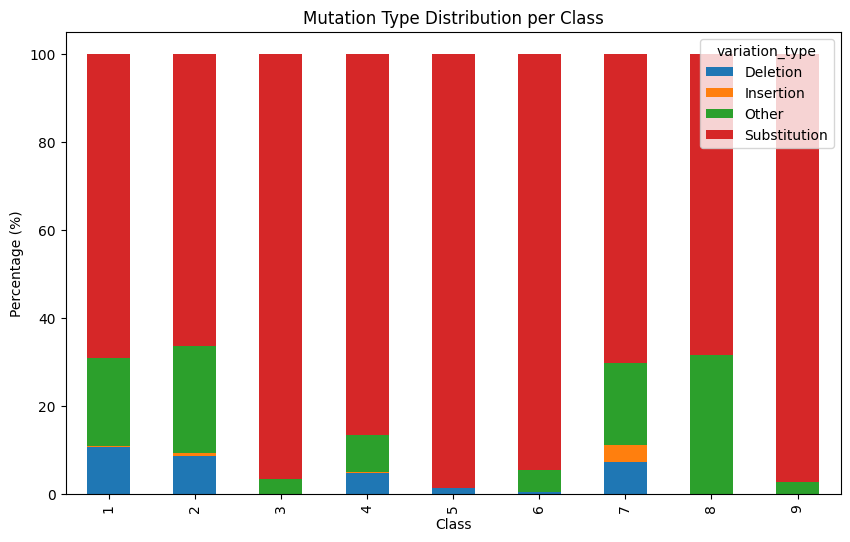

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Class and Mutation Type
cross_tab = pd.crosstab(train['Class'], train['variation_type'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mutation Type Distribution per Class')
plt.ylabel('Percentage (%)')
plt.show()

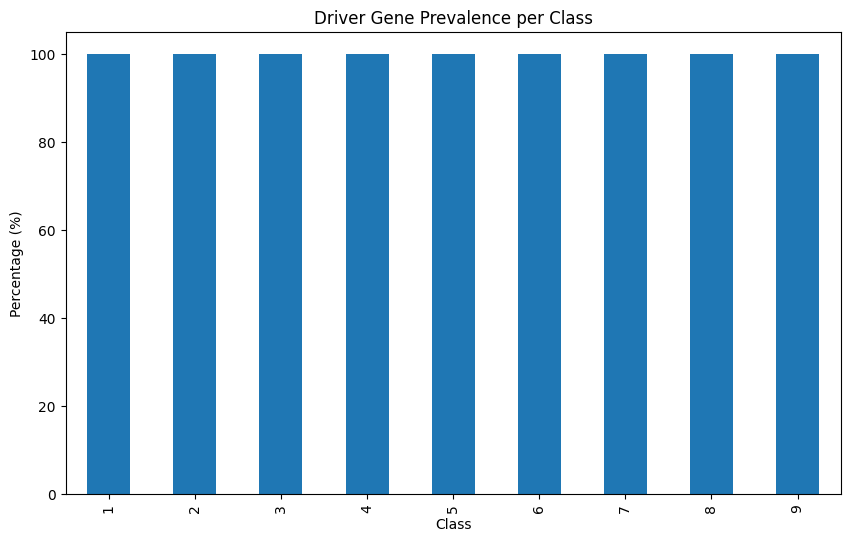

In [ ]:
# Load COSMIC CGC genes (replace with actual data)
cosmic_genes = train['Gene'].tolist()
train['Is_Driver_Gene'] = train['Gene'].isin(cosmic_genes)

# Calculate % of driver genes per class
driver_per_class = train.groupby('Class')['Is_Driver_Gene'].mean() * 100
driver_per_class.plot(kind='bar', figsize=(10, 6))
plt.title('Driver Gene Prevalence per Class')
plt.ylabel('Percentage (%)')
plt.show()

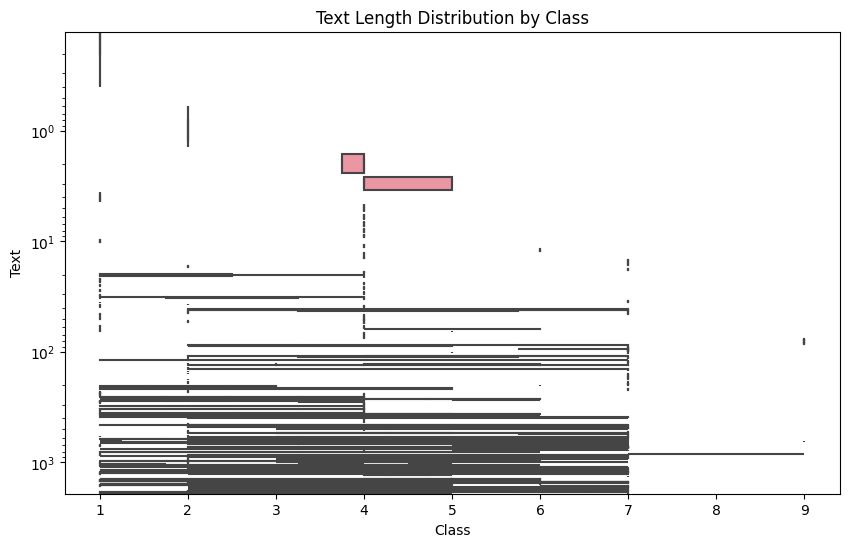

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Text', data=train, showfliers=False)
plt.yscale('log')  # Handle large text length ranges
plt.title('Text Length Distribution by Class')
plt.show()

In [ ]:
train.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'Text'], dtype='object')

In [ ]:
print(train['Text'].isnull().sum())

0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# For Class 1 (Driver)
driver_text = train[train['Class'] == 1]['Text']
tfidf = TfidfVectorizer(max_features=50,
                        lowercase=True,
    stop_words='english',
    strip_accents='unicode',
    token_pattern=r'\b[a-zA-Z]{3,}\b'
                        )
tfidf_matrix = tfidf.fit_transform(driver_text)
print("Top Terms in Driver Class:", tfidf.get_feature_names_out())

Top Terms in Driver Class: ['activation' 'activity' 'amino' 'analysis' 'associated' 'binding'
 'cancer' 'cases' 'cell' 'cells' 'control' 'data' 'dna' 'domain'
 'expression' 'fig' 'figure' 'function' 'functional' 'gene' 'genes'
 'human' 'identified' 'levels' 'loss' 'missense' 'mutant' 'mutants'
 'mutation' 'mutations' 'observed' 'patients' 'protein' 'proteins'
 'residues' 'results' 'sequence' 'shown' 'specific' 'structure' 'study'
 'supplementary' 'table' 'tumor' 'tumors' 'type' 'used' 'using' 'variants'
 'wild']


In [ ]:
##found out that my data is multi-class classification problem

# Check the unique values in the 'Class' column
unique_classes = train_variants['Class'].unique()
print("Unique Classes:", unique_classes)

# Check the number of unique classes
num_classes = train_variants['Class'].nunique()
print("Number of Classes:", num_classes)

Unique Classes: [1 2 3 4 5 6 7 8 9]
Number of Classes: 9
